<a href="https://colab.research.google.com/github/mustafabozkaya/DeepLearningBootcamp2022/blob/master/Bootcamp_Solution/Spectogram_Recognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img align="Left" width="100" height="100" src="https://thumbs.dreamstime.com/b/mb-initial-letter-vector-logo-icon-mb-initial-letter-vector-logo-icon-204517753.jpg">](https://github.com/mustafabozkaya)

# Spectogram Recognition with CNN

---
[<img align="Left" width="800" height="300" src="https://www.researchgate.net/publication/319081627/figure/fig1/AS:534034566004736@1504335170521/Spectrogram-of-a-speech-signal-with-breath-sound-marked-as-Breath-whose-bounds-are.png">](#)



**Colab** için kimlik doğrulama adımları:

**Drive yükleme işlemi**

**Drive da dosya konumlandırmayı yapma işlemleri**

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive/',force_remount=True)

Mounted at /content/mydrive/


In [ ]:
#unmount drive
# drive.flush_and_unmount()

In [ ]:
!pwd


/content


In [ ]:
%cd /content

/content


In [ ]:
!pwd

/content


In [ ]:
#Copying current content to new editable directory
#!cp -r "../content/drive/MyDrive/spectrograms/" "/sample_data/"


+
# Package İnstalling and Controlling

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15039132561357118942
 xla_global_id: -1]

In [ ]:
!cat /proc/meminfo

MemTotal:       13297228 kB
MemFree:        10367024 kB
MemAvailable:   12076404 kB
Buffers:           74388 kB
Cached:          1741864 kB
SwapCached:            0 kB
Active:           858960 kB
Inactive:        1859496 kB
Active(anon):       1000 kB
Inactive(anon):   813988 kB
Active(file):     857960 kB
Inactive(file):  1045508 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              6532 kB
Writeback:             0 kB
AnonPages:        901984 kB
Mapped:           512896 kB
Shmem:              1264 kB
KReclaimable:      94728 kB
Slab:             127316 kB
SReclaimable:      94728 kB
SUnreclaim:        32588 kB
KernelStack:        5632 kB
PageTables:        15816 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648612 kB
Committed_AS:    3762680 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       10452 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
!pip install -q keras
!pip install -q Pillow

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()


''

In [ ]:
tf.__version__

'2.8.2'

In [ ]:
#https://github.com/astrada/google-drive-ocamlfuse/
# !mkdir -p drive
# !google-drive-ocamlfuse drive
# !ls

In [ ]:
!ls ../content

mydrive  sample_data


In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import glob
import numpy as np
import os
import shutil
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"]=(18,8)
%matplotlib inline
np.random.seed(42)

In [ ]:
cv.__version__

'4.6.0'

# Configuring İmage datasets folder 

In [ ]:
dataset_dir=f"/content/mydrive/My Drive/spectrograms/"


In [ ]:
for root, dirs, files in os.walk(dataset_dir, topdown=True):
    print("="*50)
    print(root)
    print(f"root type :{type(files)}")
    print(f"root lenth :{len(files)}")
    print(files)
    print(f"files type :{type(files)}")
    print(f"files lenth :{len(files)}")
    #print(os.path.join(root, name))
    print(dirs)
    print(f"DİR type :{type(dirs)}")
    print(f"DİR lenth :{len(dirs)}")
    print("="*50)
    

/content/mydrive/My Drive/spectrograms/
root type :<class 'list'>
root lenth :0
[]
files type :<class 'list'>
files lenth :0
['6', '5', '2', '1', '3', '8', '9', '0', '4', '7']
DİR type :<class 'list'>
DİR lenth :10
/content/mydrive/My Drive/spectrograms/6
root type :<class 'list'>
root lenth :374
['102305-6-0-0.png', '106955-6-0-0.png', '110622-6-0-0.png', '111048-6-0-0.png', '122690-6-0-0.png', '131571-6-0-0.png', '133797-6-0-0.png', '133797-6-1-0.png', '133797-6-2-0.png', '135526-6-0-0.png', '135526-6-13-0.png', '135526-6-2-0.png', '135526-6-11-0.png', '135526-6-10-0.png', '135526-6-3-0.png', '135526-6-1-0.png', '135526-6-12-0.png', '135526-6-8-0.png', '135526-6-7-0.png', '135526-6-5-0.png', '135526-6-4-0.png', '135526-6-6-0.png', '135526-6-9-0.png', '135527-6-10-0.png', '135527-6-11-0.png', '135527-6-12-0.png', '135527-6-13-0.png', '135527-6-0-0.png', '135527-6-1-0.png', '135527-6-14-3.png', '135527-6-14-0.png', '135527-6-14-2.png', '135527-6-14-1.png', '135527-6-14-10.png', '135527

In [ ]:
for root,dirs, files in os.walk(dataset_dir):
    for file in (files):
        print(os.path.join(root, file))
        break
    

/content/mydrive/My Drive/spectrograms/6/102305-6-0-0.png
/content/mydrive/My Drive/spectrograms/5/102857-5-0-0.png
/content/mydrive/My Drive/spectrograms/2/100263-2-0-117.png
/content/mydrive/My Drive/spectrograms/1/100648-1-2-0.png
/content/mydrive/My Drive/spectrograms/3/100032-3-0-0.png
/content/mydrive/My Drive/spectrograms/8/102853-8-0-0.png
/content/mydrive/My Drive/spectrograms/9/101848-9-0-3.png
/content/mydrive/My Drive/spectrograms/0/100852-0-0-10.png
/content/mydrive/My Drive/spectrograms/4/103199-4-0-5.png
/content/mydrive/My Drive/spectrograms/7/103074-7-0-0.png


In [ ]:
!ls

mydrive  sample_data


# Data Exploration

In [ ]:

class_name="1" # set to class name

train_files = glob.glob(str(os.path.join(dataset_dir,str(class_name)))+'/*')


print(*train_files)
print(f"1 spectogram img lenth :{len(train_files)}")
train_imgs = [img_to_array(load_img(img)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = np.array([fn.split('/')[5].split(".")[0].strip() for fn in train_files]) # target , y label

print('Train dataset shape:', train_imgs.shape)
print('Train labels shape:', train_labels.shape)

/content/mydrive/My Drive/spectrograms/1/100648-1-2-0.png /content/mydrive/My Drive/spectrograms/1/100648-1-1-0.png /content/mydrive/My Drive/spectrograms/1/100648-1-0-0.png /content/mydrive/My Drive/spectrograms/1/100648-1-3-0.png /content/mydrive/My Drive/spectrograms/1/100648-1-4-0.png /content/mydrive/My Drive/spectrograms/1/107090-1-1-0.png /content/mydrive/My Drive/spectrograms/1/107090-1-0-0.png /content/mydrive/My Drive/spectrograms/1/117536-1-0-0.png /content/mydrive/My Drive/spectrograms/1/118070-1-0-0.png /content/mydrive/My Drive/spectrograms/1/118496-1-0-0.png /content/mydrive/My Drive/spectrograms/1/118496-1-1-0.png /content/mydrive/My Drive/spectrograms/1/121299-1-0-0.png /content/mydrive/My Drive/spectrograms/1/125520-1-4-0.png /content/mydrive/My Drive/spectrograms/1/125520-1-1-0.png /content/mydrive/My Drive/spectrograms/1/125520-1-3-0.png /content/mydrive/My Drive/spectrograms/1/125520-1-0-0.png /content/mydrive/My Drive/spectrograms/1/125520-1-2-0.png /content/mydri

In [ ]:
train_imgs[100]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [  0.,   0.,   3.],
        [  0.,   0.,   3.],
        [  0.,   0.,   3.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [  0.,   0.,   4.],
        [  0.,   0.,   4.],
        [  0.,   0.,   4.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
train_labels[100]

'1'

In [ ]:
# create image datasets 

In [ ]:
image_size=(374,500)
batch_size=32 # paketler

#Setting train/test split
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    
    directory=dataset_dir,
    labels="inferred",
    validation_split=0.3,
    subset="training",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dataset_dir,
    labels="inferred",
    validation_split=0.3,
    subset="validation",
    seed=1007,
    image_size=image_size,
    batch_size=batch_size,
)



Found 8732 files belonging to 10 classes.
Using 6113 files for training.
Found 8732 files belonging to 10 classes.
Using 2619 files for validation.


In [ ]:
print(f"{train_ds.class_names}")

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [ ]:
# print how many images are in the training and validation datasets
print("Number of training images: ", len(train_ds))
print("Number of validation images: ", len(valid_ds))

Number of training images:  192
Number of validation images:  82


In [ ]:
# split valid dataset to test and valid
test_ds = valid_ds.take(30) # get 100 data from valid dataset
valid_ds = valid_ds.skip(30) # skip first 100

In [ ]:
# how many bachs are in the training and validation datasets
print("Number of training batches: ", len(train_ds))
print("Number of validation batches: ", len(valid_ds))
print("Number of test  batches: ", len(test_ds))

Number of training batches:  192
Number of validation batches:  52
Number of test  batches:  30


In [ ]:
dataset_type=[train_ds,valid_ds,test_ds]

In [ ]:
for ds in dataset_type:
  print(type(ds))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.SkipDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.TakeDataset'>


In [ ]:
#Checking images and labels shapes (amount of images, height, width, color channels)
for image_batch, labels_batch in test_ds.take(2):
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 374, 500, 3)
(32,)


In [ ]:
#Checking images and labels shapes (amount of images, height, width, color channels)
for image_batch, labels_batch in valid_ds.take(2):
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 374, 500, 3)
(32,)


# Data Visualizaiton

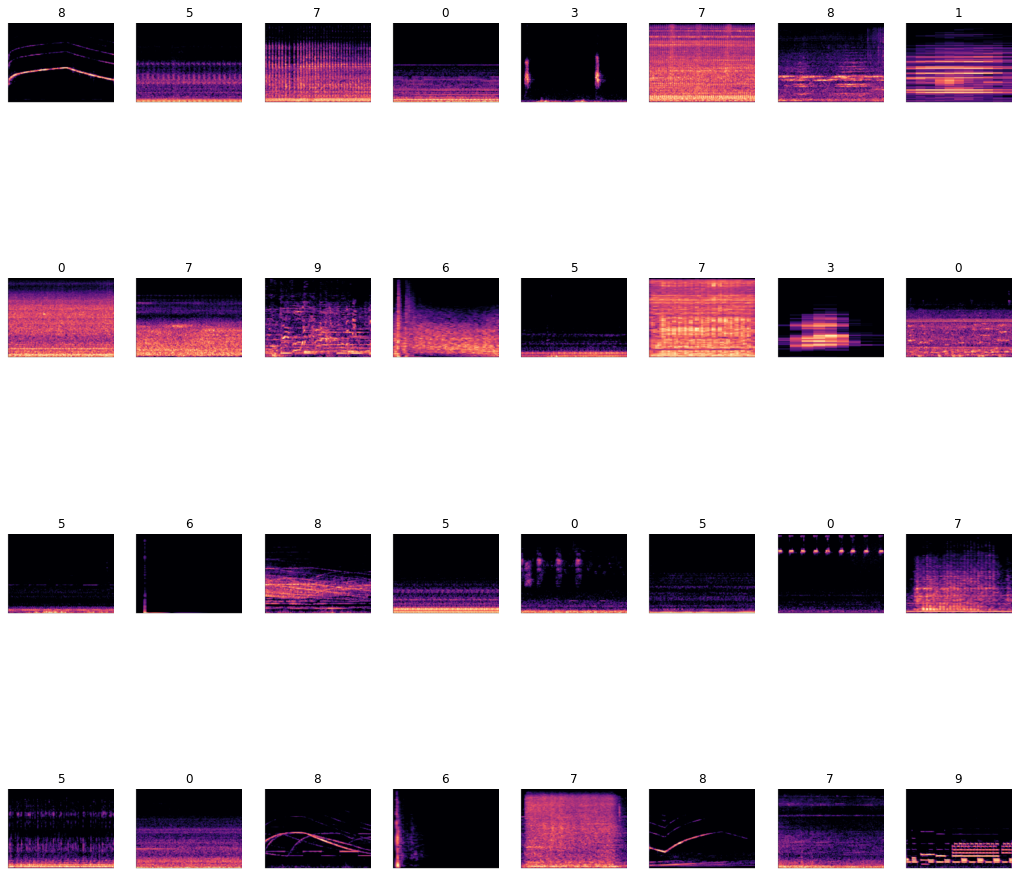

In [ ]:
#Displaying image samples 
plt.figure(figsize=(18, 18))
for images, labels in train_ds.take(1):
    for i in range(batch_size):
        ax = plt.subplot(4,8,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

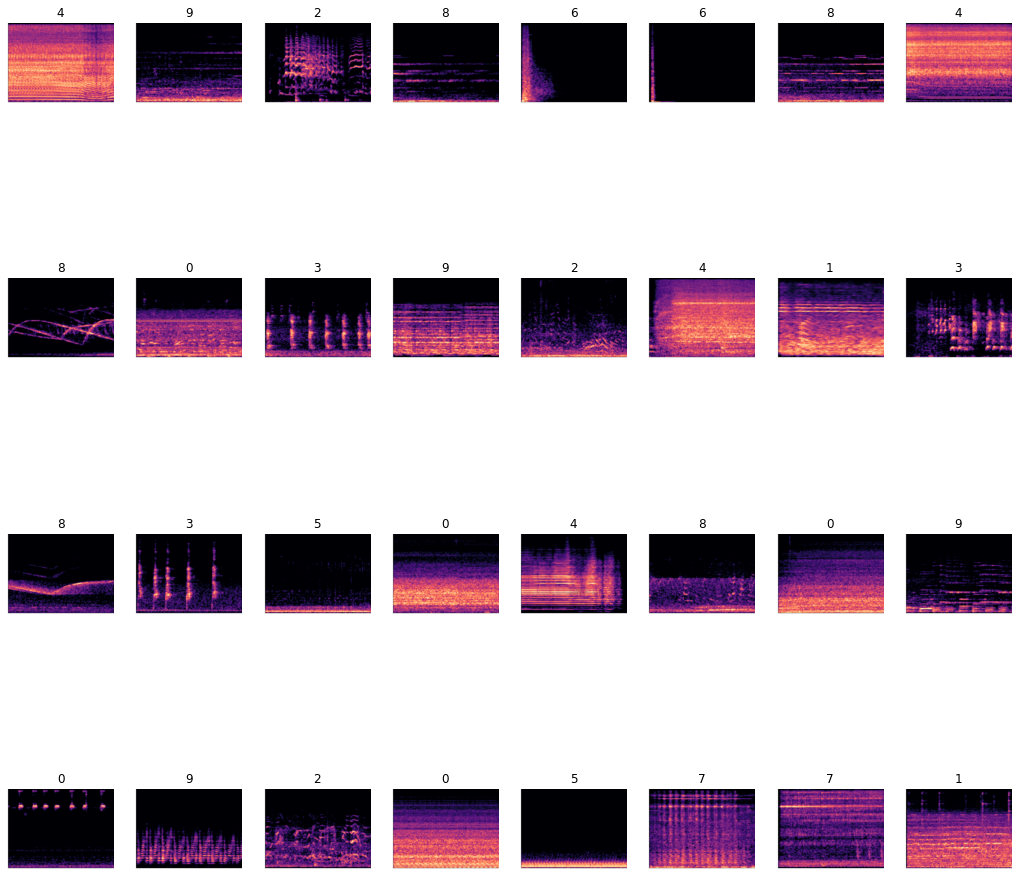

In [ ]:
#Displaying image samples 
plt.figure(figsize=(18, 18))
for images, labels in valid_ds.take(1):
    for i in range(batch_size):
        ax = plt.subplot(4,8,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

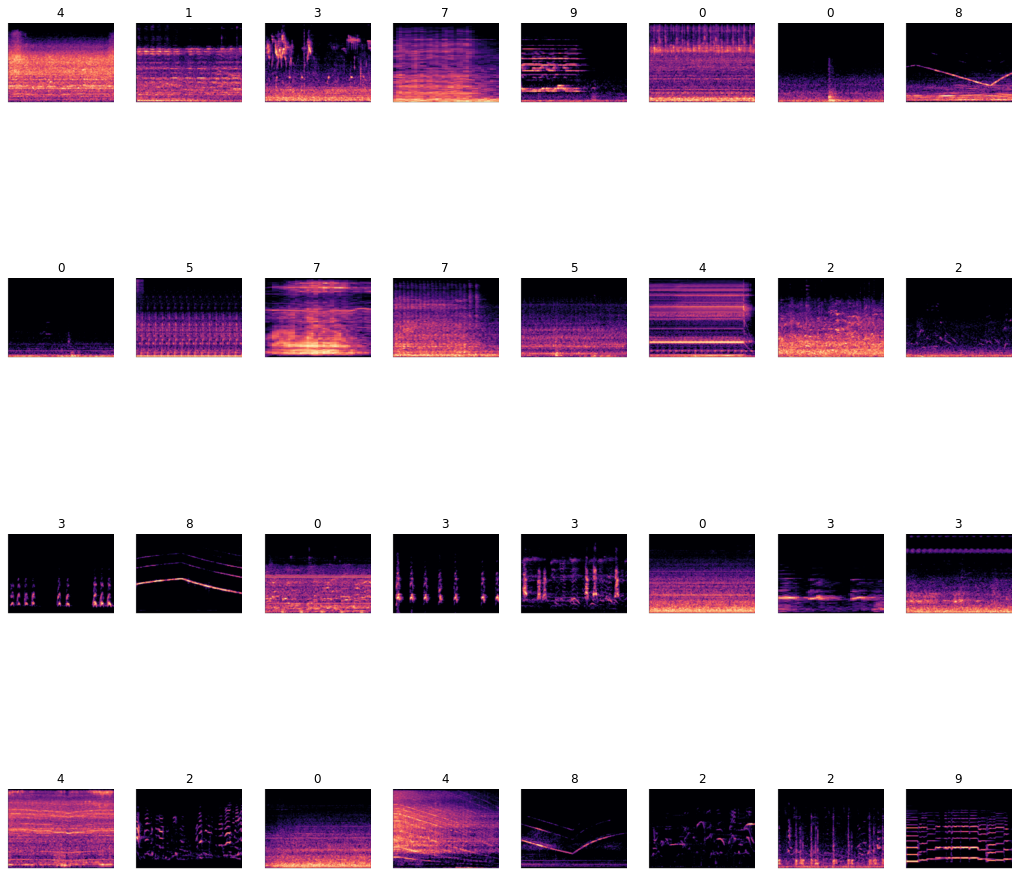

In [ ]:
#Displaying image samples 
plt.figure(figsize=(18, 18))
for images, labels in test_ds.take(1):
    for i in range(batch_size):
        ax = plt.subplot(4,8,i+1)
        #print(f"type image {images[i]}")
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

# Data Preprocessing

Before we can build our model and start training, we need to apply one simple augmentation the dataset and that is rescaling. We rescale an input in the (0, 255) range to be in the (0,1) range.

In [ ]:
# read img from tf.dataset and convert img from rgb  to gray scale with opencv
def read_img(img):

    img = tf.numpy_function(convert_to_gray_scale, [img], tf.uint8) # convert rgb to gray scale
    img = tf.expand_dims(img, -1)
    return img

# convert rgb img to gray scale img
def convert_to_gray_scale(img):
    img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    return img
def img_resize(img,size=(374,500)):
    img = cv.resize(img, size)
    return img


In [ ]:
# Function to prepare our datasets for modelling
def prepare(ds, augment=False, batch_size=None, resized_size=None,grayscale=True):
    # Define normalisation function
    rescale = tf.keras.Sequential(
        [tf.keras.layers.experimental.preprocessing.Rescaling(1./255)])
    #define data augmentation function
    flip_and_rotate = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip(
            "horizontal_and_vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
    ])
    # define resizing and batching function
    if grayscale:
        ds = ds.map(lambda x, y: (read_img(x), y))
    if resized_size:
        ds = ds.map(lambda x, y: (img_resize(x, resized_size), y))
    if batch_size:
        ds = ds.batch(batch_size)
    
    # Apply rescale to both datasets and augmentation only to training
    ds = ds.map(lambda x, y: (rescale(x, training=True), y))
    if augment:
        ds = ds.map(lambda x, y: (flip_and_rotate(x, training=True), y))
    return ds

image_size= (187,250)
train_dataset = prepare(train_ds, augment=False, batch_size=batch_size, resized_size=image_size)
valid_dataset = prepare(test_ds, augment=False, batch_size=batch_size, resized_size=image_size)
test_dataset = prepare(valid_ds, augment=False, batch_size=batch_size, resized_size=image_size)



error: ignored

# Modelling

In [ ]:
#Checking if the data format i.e the RGB channel is coming first or last so, whatever it may be, model will check first and then input shape will be feeded accordingly.
from keras import backend as K
if K.image_data_format() == "channels_first":
    input_shape = (3, img_height, img_width)
else:
    input_shape = (img_height, img_width, 3)

#Creating a model
model_dl = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(input_shape)),
  layers.Conv2D(16, 3, padding="same", activation="relu"),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding="same", activation="relu"),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding="same", activation="relu"),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation="relu"),
  layers.Dense(Dense(10, activation='softmax'))
])

In [ ]:
# Create CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))
model.add(tf.keras.layers.Conv2D(
    32, 3, strides=2, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy'],
)

# Train model for 10 epochs, capture the history
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)


In [ ]:
def conv_net(X_train, y_train): 

    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Conv2D(96, kernel_size = (3,3), input_shape = (255, 5,1), strides = (4,4), activation = 'relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (3,3),strides = (2,2))) 
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1) ,activation='relu', padding="same")) 
    model.add(tf.keras.layers.BatchNormalization()) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2))) 
    model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")) 
    model.add(tf.keras.layers.BatchNormalization()) 
    model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")) 
    model.add(tf.keras.layers.BatchNormalization()) 
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")) 
    model.add(tf.keras.layers.BatchNormalization()) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2))) 
    model.add(tf.keras.layers.Flatten()) 
    model.add(tf.keras.layers.Dense(4096, activation='relu')) 
    model.add(tf.keras.layers.Dropout(0.5)) 
    model.add(tf.keras.layers.Dense(4096, activation='relu')) 
    model.add(tf.keras.layers.Dropout(0.5)) 
    model.add(tf.keras.layers.Dense(2048, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1024, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax')) 
    
    return model

# Model Visualization

In [ ]:
model_dl.summary()


In [ ]:

model_dl.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

### 

In [ ]:
model_dl.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

In [ ]:
model_dl.save('save_models/spectogram_model.h5')

In [ ]:
score = model_dl.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])


**Rastgele değer için test işlemi**

In [ ]:
model_test = model_dl.save('save_models/spectogram_model.h5')

# Model Evaluation

In [ ]:
# Plot the loss curves for training and validation.
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Plot the accuracy curves for training and validation.
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


We can compute the final loss and accuracy score on our valid dataset using the evaluate() function.

In [ ]:
# Compute the final loss and accuracy
final_loss, final_acc = model.evaluate(valid_dataset, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(
    final_loss, final_acc))
